# Machine Learning - Technical Assignment 1

**Name:**       Alexandre Frantz

**Student ID:** 0170616914

**Date:**       13.10.2022

## Environment setup and package instalation

Main Reference: https://www.kaggle.com/code/ziadhamadafathy/classification-using-some-types-models

In [1]:
!python -m venv sklearn-venv
!sklearn-venv\Scripts\activate
!pip install -U scikit-learn
!pip install -U pandas
!pip install matplotlib
!pip install seaborn
!pip install tensorflow

You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.0
    Uninstalling pandas-1.5.0:
      Successfully uninstalled pandas-1.5.0


You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### Check Instalation

In [2]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.1.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\alex\appdata\local\programs\python\python39\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [3]:
!python -c "import sklearn; sklearn.show_versions()"


System:
    python: 3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
executable: c:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
      sklearn: 1.1.2
          pip: 21.3.1
   setuptools: 57.4.0
        numpy: 1.21.2
        scipy: 1.7.1
       Cython: None
       pandas: 1.5.1
   matplotlib: 3.5.0
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\Alex\AppData\Local\Programs\Python\Python39\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 16

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\Alex\AppData\Local\Programs\Python\Python39\Lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
        version: 0.3.17
threadin

## Assignment Source Code

### Random Forest Classifier Approach

Import necessary packages/libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as st
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

Data Preprocessing

In [2]:
dataset = pd.read_csv("dataset.csv")

In [6]:
dataset.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [7]:
dataset.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [8]:
dataset.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
dataset.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [11]:
dataset.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [12]:
dataset.shape
dataset.dropna()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


Convert to dataframe for manipulation

In [3]:
#dataset = sklearn.utils.shuffle(dataset)

df = pd.DataFrame(dataset)

Relabel class values to integers for training (strings are not supported)

In [4]:
print(df['class'].value_counts())
# Replace celestial body class with:
# 0: GALAXY
# 1: STAR
# 2: QSO
df['class'] = df['class'].replace(to_replace='GALAXY' , value=0)

df['class'] = df['class'].replace(to_replace='STAR' , value=1)

df['class'] = df['class'].replace(to_replace='QSO' , value=2)



GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


Drop columns that are not needed for the training and later classification of our model

In [5]:
df.drop(columns = ['objid', 'rerun', 'field', 'specobjid', 'plate', 'mjd', 'fiberid'], inplace=True)

In [51]:
from os import X_OK


x = df.drop(labels='class', axis=1)
y = df['class']
(X_train, X_test, y_train, y_test) = ms.train_test_split(x, y, test_size=.2, random_state=0) 

print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


In [17]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print('RandomForestClassifierModel Train Score is : ' , clf.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , clf.score(X_test, y_test))


ACCURACY OF THE MODEL:  0.986
RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.986


Confusion Matrix

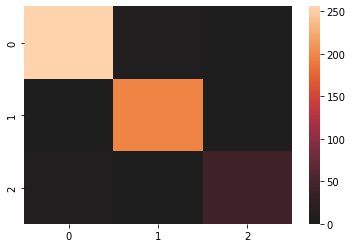

Confusion Matrix is
 [[256   3   0]
 [  0 196   0]
 [  4   0  41]]


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_RF = clf.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)



Cross validation of the model

In [19]:
ms.cross_val_score(clf, x, y, cv=5)

array([0.9905, 0.9925, 0.9925, 0.984 , 0.988 ])

### Simple Neural Newtork Approach

In [8]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


Define NN model architecture

In [54]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
opt = tf.keras.optimizers.Adam()

early_stop_cb =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

print(X_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(10,)),
  #tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['accuracy'])

model.summary()

(8000, 10)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 10)                0         
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 8)                 88        
                                                                 
 dense_38 (Dense)            (None, 4)                 36        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.3, callbacks=[early_stop_cb], batch_size=32)


model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/200


c:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


88/88 [==============================] - 1s 6ms/step - loss: 74.5690 - accuracy: 0.4732 - val_loss: 26.2337 - val_accuracy: 0.4492
Epoch 2/200
88/88 [==============================] - 0s 3ms/step - loss: 17.9812 - accuracy: 0.4607 - val_loss: 10.1822 - val_accuracy: 0.4479
Epoch 3/200
88/88 [==============================] - 0s 3ms/step - loss: 6.7481 - accuracy: 0.4332 - val_loss: 4.6337 - val_accuracy: 0.4346
Epoch 4/200
88/88 [==============================] - 0s 3ms/step - loss: 3.0977 - accuracy: 0.4534 - val_loss: 1.4592 - val_accuracy: 0.4425
Epoch 5/200
88/88 [==============================] - 0s 3ms/step - loss: 1.2808 - accuracy: 0.4700 - val_loss: 1.0870 - val_accuracy: 0.4796
Epoch 6/200
88/88 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.4789 - val_loss: 1.1813 - val_accuracy: 0.4242
Epoch 7/200
88/88 [==============================] - 0s 3ms/step - loss: 1.0211 - accuracy: 0.4818 - val_loss: 0.9338 - val_accuracy: 0.5450
Epoch 8/200
88/88 [==

[0.8884322047233582, 0.5134999752044678]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


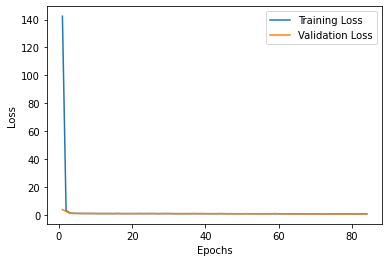

In [45]:
print(history.history.keys())
loss_values = history.history['loss']
accuracy_values = history.history['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, accuracy_values,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

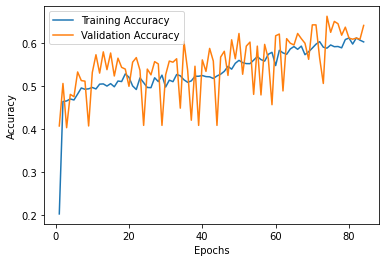

In [46]:
training_accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, training_accuracy_values, label='Training Accuracy')
plt.plot(epochs, val_accuracy_values,  label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()